## Load data and view distribution

In [48]:
# Functions loading data from json file to dataframe
import json

def load_json_data(domain1_train_file, domain2_train_file, test_data_file):
    def load_json_lines(file):
        with open(file, "r") as f:
            return [json.loads(line) for line in f if line.strip()]  # avoid empty line

    domain1_train_data = load_json_lines(domain1_train_file)
    domain2_train_data = load_json_lines(domain2_train_file)
    test_data = load_json_lines(test_data_file)

    return domain1_train_data, domain2_train_data, test_data



import pandas as pd

# Convert to dataframe from list
def convert_to_dataframe(domain1_train_data, domain2_train_data, test_data):

    df_train_domain1 = pd.DataFrame(domain1_train_data)

    df_train_domain2 = pd.DataFrame(domain2_train_data)

    df_test = pd.DataFrame(test_data)

    return df_train_domain1, df_train_domain2, df_test


# Load data from json file to dataframe
domain1_train_file = "domain1_train_data.json"
domain2_train_file = "domain2_train_data.json"
test_data_file = "test_data.json"

domain1_train_data, domain2_train_data, test_data = load_json_data(domain1_train_file, domain2_train_file, test_data_file)
df_train_domain1, df_train_domain2, df_test = convert_to_dataframe(domain1_train_data, domain2_train_data, test_data)

In [49]:
# Domain1 data distribution
label_counts_domain1 = df_train_domain1['label'].value_counts()
print("Label distribution - train dataset domain1\n", label_counts_domain1)

# Domain2 data distribution
label_counts_domain2 = df_train_domain2['label'].value_counts()
print("Label distribution - train dataset domain2\n", label_counts_domain2)

Label distribution - train dataset domain1
 label
0    500
1    500
Name: count, dtype: int64
Label distribution - train dataset domain2
 label
1    4750
0     250
Name: count, dtype: int64


Domain 1 - Max Length: 123; Min Length: 75
Domain 2 - Max Length: 91; Min Length: 55
Test Set - Max Length: 6154; Min Length: 0
Domain 1:
 count    1000.000000
mean       81.551000
std         2.585747
min        75.000000
25%        80.000000
50%        81.000000
75%        82.000000
max       123.000000
Name: text, dtype: float64
Domain 2:
 count    5000.000000
mean       80.086000
std         2.617551
min        55.000000
25%        80.000000
50%        80.000000
75%        81.000000
max        91.000000
Name: text, dtype: float64
Test:
 count    4000.000000
mean      235.754500
std       206.631388
min         0.000000
25%       138.000000
50%       196.000000
75%       267.000000
max      6154.000000
Name: text, dtype: float64


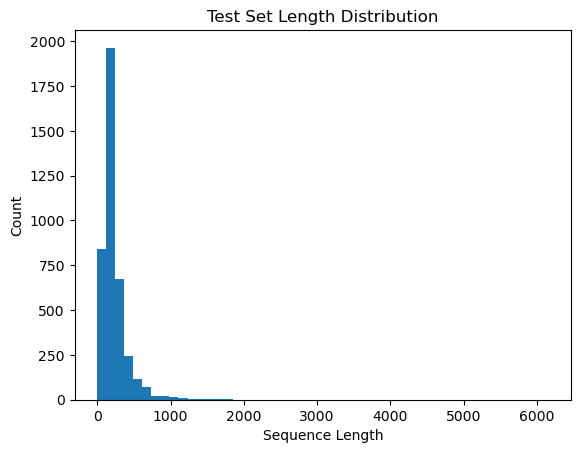

In [50]:
# Check length of text -> for max_len param in Transformer

# get length
len_domain1 = df_train_domain1['text'].apply(len)
len_domain2 = df_train_domain2['text'].apply(len)
len_test = df_test['text'].apply(len)

# get maximum
print(f"Domain 1 - Max Length: {len_domain1.max()}; Min Length: {len_domain1.min()}")
print(f"Domain 2 - Max Length: {len_domain2.max()}; Min Length: {len_domain2.min()}")
print(f"Test Set - Max Length: {len_test.max()}; Min Length: {len_test.min()}")


# get median
print("Domain 1:\n", len_domain1.describe())
print("Domain 2:\n", len_domain2.describe())
print("Test:\n", len_test.describe())


# show distribution
from matplotlib import pyplot as plt

lens = df_test['text'].apply(len)
plt.hist(lens, bins=50)
plt.title("Test Set Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.show()

In [51]:
lengths = df_test['text'].apply(len)
print((lengths <= 512).mean())  # percentage

0.93825


## Apply Truncating & Padding to column 'text'

In [58]:
# adjust the length of text to same size
def pad_or_truncate(sequence, max_len, pad_token=0):
    if len(sequence) < max_len:
        return sequence + (max_len - len(sequence)) * [pad_token]
    else:
        return sequence[:max_len]

MAX_LEN = 512
df_train_domain1['text'] = df_train_domain1['text'].apply(lambda x: pad_or_truncate(x, MAX_LEN))
df_train_domain2['text'] = df_train_domain2['text'].apply(lambda x: pad_or_truncate(x, MAX_LEN))
df_test['text'] = df_test['text'].apply(lambda x: truncate_or_pad(x, MAX_LEN))

# check length
len_domain1 = df_train_domain1['text'].apply(len)
len_domain2 = df_train_domain2['text'].apply(len)
len_test = df_test['text'].apply(len)
print(f"Domain 1 - Max Length: {len_domain1.max()}; Min Length: {len_domain1.min()}")
print(f"Domain 2 - Max Length: {len_domain2.max()}; Min Length: {len_domain2.min()}")
print(f"Test Set - Max Length: {len_test.max()}; Min Length: {len_test.min()}")

Domain 1 - Max Length: 512; Min Length: 512
Domain 2 - Max Length: 512; Min Length: 512
Test Set - Max Length: 512; Min Length: 512


In [59]:
df_train_domain1.head()

,text,label,id
0,"[6, 22, 34, 76, 501, 977, 1, 2514, 13623, 76, ...",0,0
1,"[222, 31, 4108, 104, 132, 361, 39, 2305, 12, 9...",0,1
2,"[736, 7194, 113, 12, 366, 2870, 123, 101, 12, ...",0,2
3,"[48, 1, 2025, 69, 361, 533, 327, 237, 4150, 13...",0,3
4,"[2973, 66, 1, 1493, 260, 2740, 50, 1027, 50, 1...",0,4


In [60]:
df_test.head()

,text,id
0,"[9159, 3048, 238, 276, 162, 286, 305, 22, 36, ...",0
1,"[64, 5039, 1275, 6, 0, 871, 139, 270, 327, 237...",1
2,"[327, 618, 76, 650, 121, 274, 1025, 0, 12207, ...",2
3,"[6, 12, 609, 11905, 4, 879, 677, 78, 13352, 60...",3
4,"[1, 5504, 55, 22, 101, 3783, 139, 2664, 4, 1, ...",4
